In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from src import *
style.use('seaborn-dark')

## Read data and create STLayer object

In [2]:
def getCoordinates(df):
    """
    Extracts spatial coordinates from ST data with index in 'AxB' type format.
    
    Return: pandas dataframe of coordinates
    """
    coor = []
    for spot in df.index:
        coordinates = spot.split('x')
        coordinates = [float(i) for i in coordinates]
        coor.append(coordinates)
    return coor

In [3]:
layer1_path = "sample_data/layer1.csv"
layer2_path = "sample_data/layer2.csv"
layer3_path = "sample_data/layer3.csv"
layer1_raw_df = pd.read_csv(layer1_path, index_col=0)
layer2_raw_df = pd.read_csv(layer2_path, index_col=0)
layer3_raw_df = pd.read_csv(layer3_path, index_col=0)


layer1 = STLayer(layer1_raw_df, getCoordinates(layer1_raw_df))
layer2 = STLayer(layer2_raw_df, getCoordinates(layer2_raw_df))
layer3 = STLayer(layer3_raw_df, getCoordinates(layer3_raw_df))

In [4]:
layer1.gene_exp

,GAPDH,UBE2G2,MAPKAPK2,NDUFA7,ASNA1,CLASP1,INAFM1,MCL1,AP1G1,SEMA3B,...,NIPA2,ZBTB25,CCDC74B,EIF2B1,FLYWCH1,DIP2C,LYPLA2,RGP1,BPGM,HPS6
13.064x6.086,12,0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.116x7.015,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0
13.945x6.999,15,1,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12.987x7.011,8,0,0,0,1,0,0,6,0,0,...,0,0,0,0,0,1,0,0,0,0
15.011x7.984,4,0,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21.953x24.847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.98x24.963,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20.063x24.964,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
19.007x25.045,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
layer1.coordinates

array([[13.064,  6.086],
       [12.116,  7.015],
       [13.945,  6.999],
       [12.987,  7.011],
       [15.011,  7.984],
       [12.05 ,  8.018],
       [13.048,  7.992],
       [13.917,  7.99 ],
       [17.979,  8.976],
       [12.087,  9.011],
       [13.035,  8.988],
       [18.96 ,  8.988],
       [14.006,  8.991],
       [16.959,  8.987],
       [15.026,  9.034],
       [15.891,  9.021],
       [10.832,  9.842],
       [20.017,  9.935],
       [18.881,  9.944],
       [13.989,  9.976],
       [17.947,  9.973],
       [13.05 ,  9.981],
       [12.087,  9.969],
       [17.083,  9.985],
       [15.932,  9.991],
       [15.023,  9.995],
       [10.839, 10.825],
       [21.901, 10.865],
       [12.052, 10.965],
       [17.961, 10.952],
       [20.978, 10.943],
       [20.022, 10.956],
       [16.953, 10.961],
       [14.99 , 10.969],
       [15.938, 10.973],
       [13.023, 10.971],
       [13.944, 10.971],
       [18.963, 10.983],
       [10.771, 11.828],
       [21.919, 11.831],


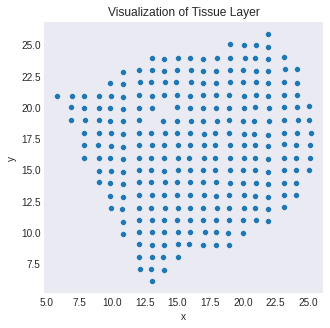

In [6]:
layer1.plot()

## Run PASTE

Preprocess gene expression matrices

In [7]:
layer1.filter_genes(15)
layer2.filter_genes(15)
layer3.filter_genes(15)

Pairwise Alignment

In [8]:
pi = pairwise_align(layer1, layer2)

In [9]:
pd.DataFrame(pi)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,0.003937,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000047,0.003890,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.003937,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000094,0.003843,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00389,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000094,0.0,0.003796,0.000047,0.000000
250,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.003937,0.000000
251,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000141,0.003608,0.0,0.000000,0.0,0.000188,0.000000,0.000000
252,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.003561,0.000000,0.000376,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Center Alignment

In [10]:
layers = [layer1, layer2, layer3]
initial_layer = layer1
lmbda = len(layers)*[1/len(layers)]

In [11]:
W, H, pis = center_align(initial_layer, layers, lmbda)

/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Iteration: 0


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 1.4511126187417065
Iteration: 1


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 0.06249792857522163
Iteration: 2


/home/max/Programs/envs/spatialOT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


R - R_new: 0.00038021776654595385


In [12]:
pd.DataFrame(W)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.013697,0.333695,0.095916,0.147672,0.055861,0.000000,1.135327,0.017515,0.030787,0.150277,0.102388,0.040267,0.000000,0.000000,0.048308
1,0.043870,0.974829,0.232742,0.000000,0.000000,0.000000,0.583243,0.000000,0.000000,0.442400,0.217715,0.076808,0.000000,0.158649,0.287249
2,0.165818,0.398512,0.720493,0.000000,0.000000,0.327499,0.537450,0.000000,0.028536,0.413137,0.257470,0.050277,0.000000,0.084892,0.494579
3,0.000000,0.066452,1.104968,0.084683,0.082562,0.000000,1.122992,0.000000,0.004155,0.264156,0.038925,0.000000,0.000000,0.000000,0.130953
4,0.246411,0.128282,1.924825,0.000000,0.000000,0.337472,1.627789,0.334552,0.035346,0.124793,0.019953,0.000000,0.033147,0.000171,0.095180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.010965,0.012585,0.000000,0.000000,0.012256,0.000000,0.036413,0.003475,0.053203,0.000000,0.062196,0.007801,0.000000,0.000000,0.039494
250,0.067756,0.000000,0.000000,0.007190,0.015051,0.000000,0.060998,0.068195,0.049025,0.139012,0.000000,0.010428,0.031415,0.000000,0.010446
251,0.031546,0.115930,0.000000,0.000595,0.008848,0.000000,0.022096,0.000000,0.046440,0.122450,0.003987,0.000000,0.000000,0.000000,0.006725
252,0.091878,0.037475,0.000000,0.021402,0.003590,0.071959,0.106369,0.010260,0.058887,0.132980,0.040705,0.028298,0.000000,0.041348,0.036260


In [13]:
pd.DataFrame(H)

,0,1,2,3,4,5,6,7,8,9,...,6688,6689,6690,6691,6692,6693,6694,6695,6696,6697
0,0.030897,0.000000,0.024293,0.000000,0.057271,0.000000,0.000000,0.000000,0.320170,0.471237,...,0.000000,0.095283,0.938457,0.000000,0.229586,0.215554,0.000000,0.139278,0.333978,0.080418
1,0.067240,0.164525,0.024334,0.000000,0.013914,0.000000,0.000000,0.056461,0.000000,0.365421,...,0.033242,0.000000,0.300366,0.000000,0.000000,0.009152,0.007227,0.000000,0.077224,0.009951
2,0.015595,0.000000,0.040695,0.008431,0.022679,0.000000,0.000000,0.076901,0.000000,0.106468,...,0.014227,0.044813,0.224624,0.000000,0.082914,0.000000,0.015890,0.000000,0.000000,0.016878
3,0.000660,0.093821,0.000000,0.158608,0.053532,0.000000,0.010523,0.321549,0.113764,0.000000,...,0.125516,0.091487,0.000000,0.068956,0.036827,0.000000,0.000000,0.008747,0.307587,0.000000
4,0.071825,0.000000,0.000000,0.538921,0.000000,2.500036,0.000000,0.000000,1.143881,0.190999,...,0.041524,0.000000,2.273591,0.269321,0.000000,0.000000,0.194240,0.000000,0.324968,0.334524
5,0.035427,0.115905,0.073085,0.000000,0.003979,0.042386,0.000000,0.067755,0.022523,0.414539,...,0.018597,0.034474,0.251665,0.076125,0.387021,0.000000,0.000939,0.102160,0.018361,0.000000
6,0.002925,0.106235,0.000000,0.000000,0.056936,0.000000,0.102180,0.003279,0.089970,0.484935,...,0.000000,0.000000,0.044177,0.192268,0.000000,0.162327,0.043721,0.038223,0.048881,0.151374
7,0.000000,0.000000,0.006442,0.231418,0.047143,0.080061,0.000000,0.071475,0.095653,0.174244,...,0.000000,0.061455,0.341583,0.077507,0.000000,0.000000,0.025735,0.085636,0.112849,0.067470
8,0.066526,3.803123,0.172060,0.902040,0.000000,0.000000,0.000861,0.544360,0.000000,3.865263,...,0.000000,0.473229,1.240856,1.758926,1.069248,0.291788,0.000000,0.000000,2.273241,0.000000
9,0.000000,0.264676,0.000000,0.000000,0.097004,0.185785,0.000000,0.000000,0.216378,0.867399,...,0.107394,0.049823,0.015155,0.003968,0.154383,0.000000,0.000000,0.000000,0.000000,0.332751
